In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# 1. Generate a synthetic regression dataset
X, y = make_regression(
    n_samples=500,
    n_features=1,
    noise=15,
    random_state=0
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)


In [ ]:
# 1.1 Loop over different n_estimators and store errors
train_errors, test_errors = [], []
estimators = [10, 50, 100, 200, 500, 1000]

for n in estimators:
    gbr = GradientBoostingRegressor(
        n_estimators=n,
        learning_rate=0.05,  # smaller learning rate for smoother improvement
        max_depth=3,
        random_state=0
    )
    gbr.fit(X_train, y_train)
    
    train_errors.append(mean_squared_error(y_train, gbr.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, gbr.predict(X_test)))

Train MSEs: [(10, np.float64(952.89)), (50, np.float64(190.78)), (100, np.float64(153.97)), (200, np.float64(127.15)), (500, np.float64(71.71)), (1000, np.float64(29.57))]
Test MSEs: [(10, np.float64(953.96)), (50, np.float64(220.41)), (100, np.float64(219.55)), (200, np.float64(236.2)), (500, np.float64(292.05)), (1000, np.float64(343.67))]


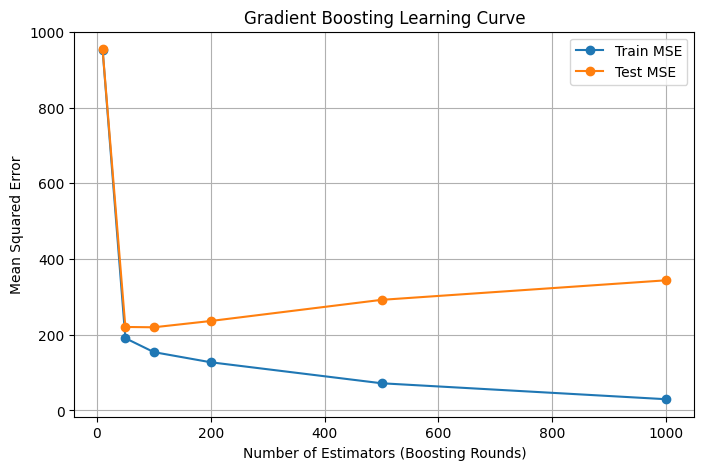

In [ ]:
# 1.2 Print errors for reference
print("Train MSEs:", list(zip(estimators, np.round(train_errors, 2))))
print("Test MSEs:", list(zip(estimators, np.round(test_errors, 2))))

# Plot learning curve
plt.figure(figsize=(8,5))
plt.plot(estimators, train_errors, marker="o", label="Train MSE")
plt.plot(estimators, test_errors, marker="o", label="Test MSE")
plt.xlabel("Number of Estimators (Boosting Rounds)")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Boosting Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# 2. Baseline: single Decision Tree
tree = DecisionTreeRegressor(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
print("Decision Tree MSE:", round(mse_tree, 2))

Decision Tree MSE: 226.89


In [8]:
# 3. Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=50,     # number of boosting stages
    learning_rate=0.1,    # step size shrinkage
    max_depth=3,          # depth of each tree
    random_state=0
)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print("Gradient Boosting MSE:", round(mse_gbr, 2))


Gradient Boosting MSE: 219.71
